In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df=pd.read_csv('./data/서울시_아파트_실거래가_2014~2018.csv', engine='python')

In [68]:
df=df.drop('Unnamed: 0', axis=1)

In [69]:
df.head()

,지역코드,법정동,년,월,일,아파트,건축년도,층,전용면적,거래금액
0,11110,청운동,2014,1,21~31,청운현대,2000,5,84.51,"64,000"
1,11110,사직동,2014,1,11~20,광화문풍림스페이스본(101동~105동),2008,5,126.34,"93,000"
2,11110,사직동,2014,1,11~20,광화문풍림스페이스본(106동),2008,10,153.42,"135,000"
3,11110,사직동,2014,1,21~31,광화문풍림스페이스본(101동~105동),2008,2,151.81,"90,000"
4,11110,사직동,2014,1,21~31,광화문풍림스페이스본(101동~105동),2008,8,94.51,"73,000"


In [70]:
#거래금액이 numeric 데이터가 아님
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
지역코드    10000 non-null int64
법정동     10000 non-null object
년       10000 non-null int64
월       10000 non-null int64
일       10000 non-null object
아파트     10000 non-null object
건축년도    10000 non-null int64
층       10000 non-null int64
전용면적    10000 non-null float64
거래금액    10000 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 781.3+ KB


In [71]:
#pd.to_numeric 시 쉼표str)로 인해서 오류가 생김
df['거래금액']=df['거래금액'].apply(lambda x: x.replace(',',''))
df['거래금액']=pd.to_numeric(df['거래금액'], errors='coerce')

In [72]:
df['거래금액'].head()

0     64000
1     93000
2    135000
3     90000
4     73000
Name: 거래금액, dtype: int64

In [28]:
#전용면적인 range별 카테고리화 할 필요가 있음
df['전용면적'].value_counts().head()

84.99    231
84.96    185
84.90    178
84.97    177
84.88    165
Name: 전용면적, dtype: int64

In [85]:
df['전용면적']=df['전용면적'].astype('int')

In [155]:
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

24.0
['AppleGothic']


In [160]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 24.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

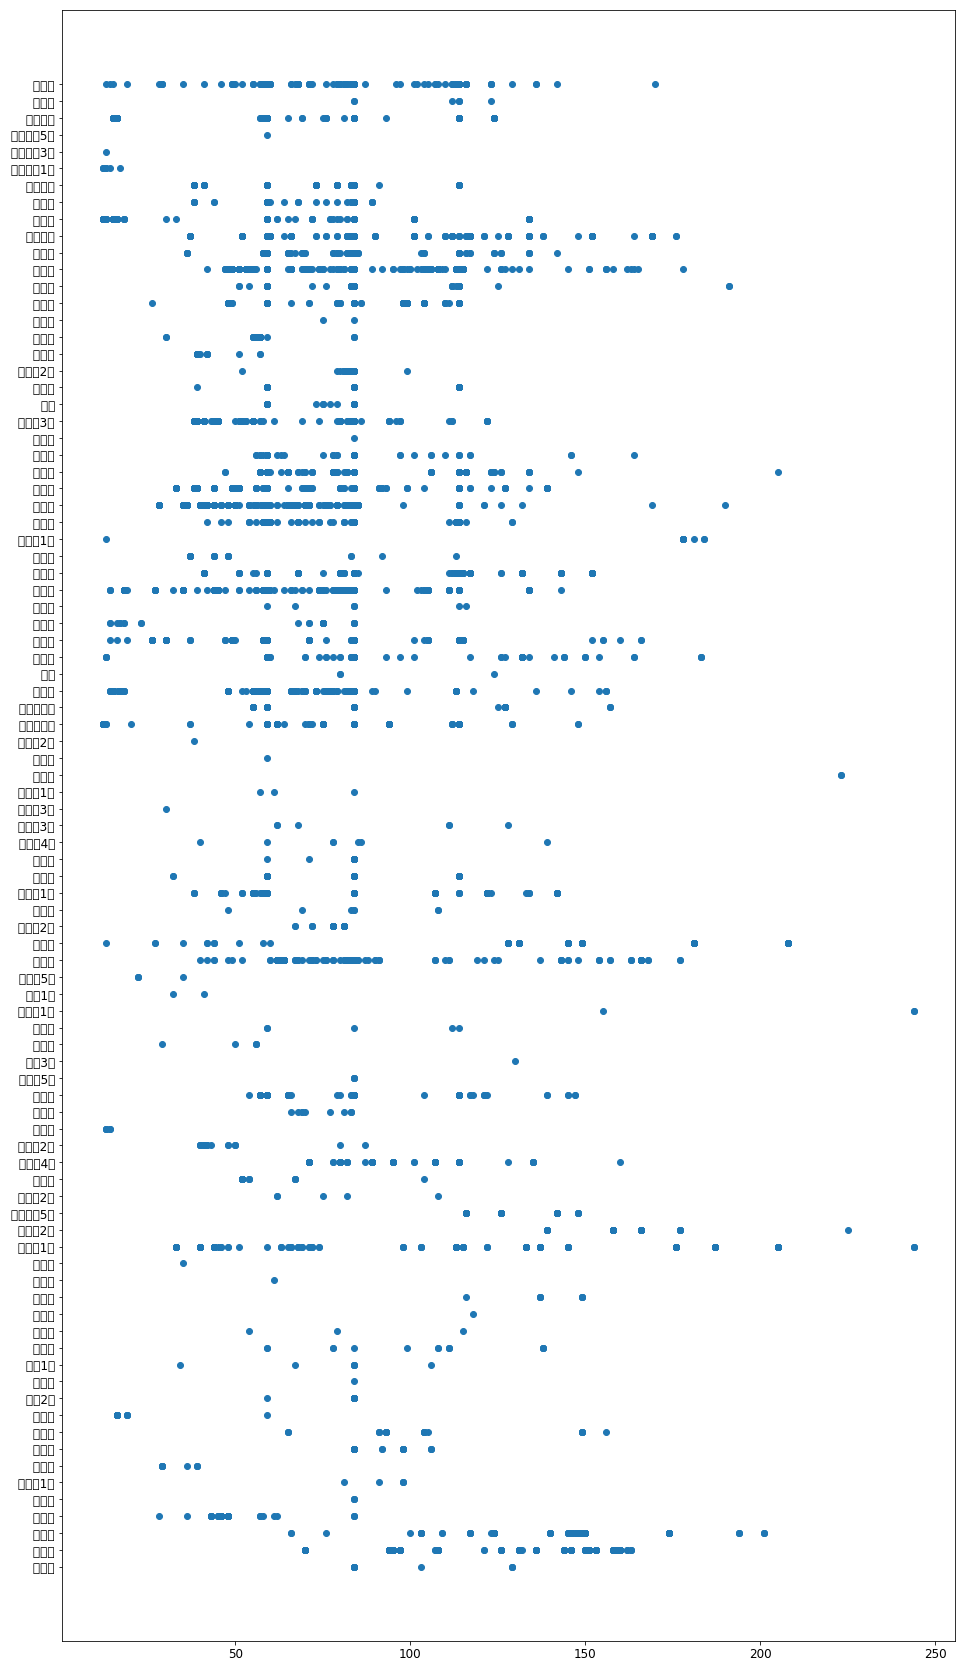

In [161]:
fig=plt.figure(figsize=(16,30))
plt.scatter("전용면적","법정동", data=df)
plt.show()